## Aprendizado não supervisionado
### Aplicação do algorithm KMeans para clusterização de dados

In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [27]:
input_file = 'train.csv'
columns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 
           'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 
           'n_cores', 'pc', 'px_height', 'px_width', 'ram', 
           'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 
           'wifi', 'price_range', 'id']

# Load the data
df = pd.read_csv(input_file)

In [28]:
# sns.scatterplot(x='battery_power', y='ram', hue='price_range', data=df)

In [29]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

In [42]:
# normalizing min max
# x_train = preprocessing.normalize(df)
features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
target = 'price_range'
x = df.loc[:, features].values
y = df.loc[:, target].values

# Normalize the data

# Min Max
x_minmax = MinMaxScaler().fit_transform(x)
normalized_minmax = pd.DataFrame(x_minmax, columns = features)
# normalized_minmax = pd.concat([normalized_minmax, df[[target]]], axis = 1)

# Z-Score
x_zscore = StandardScaler().fit_transform(x)
normalized_zscore = pd.DataFrame(x_zscore, columns = features)
# normalized_zscore = pd.concat([normalized_zscore, df[[target]]], axis = 1)



In [31]:
def plot_samples(projected, labels, title):    
    fig = plt.figure()
    u_labels = np.unique(labels)
    for i in u_labels:
        plt.scatter(projected[labels == i , 0] , projected[labels == i , 1] , label = i,
                    edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('tab10', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    
    # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.legend()
    plt.title(title)
    plt.show()

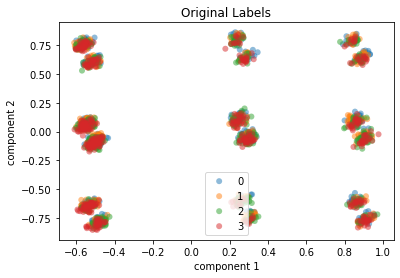

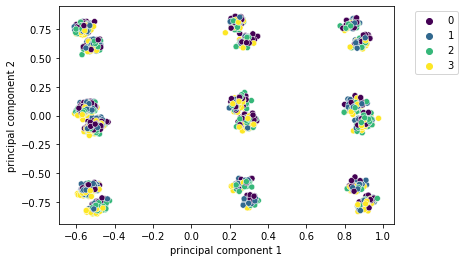

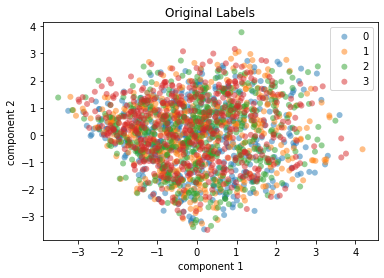

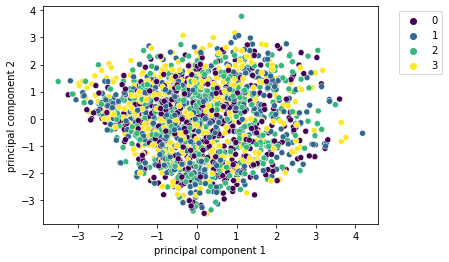

In [32]:
# PCA implementation
# Assuming 'x' is your feature set and 'df' is your original DataFrame

# Perform PCA with 2 components
def apply_pca(normalized):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(normalized)

    plot_samples(principalComponents, y, 'Original Labels')

    # Create a DataFrame with the principal components
    principal_breast_Df = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

    # Add the target variable to the principal component DataFrame
    principal_breast_Df[target] = df[target].values

    # Plot the scatter plot
    sns.scatterplot(x='principal component 1', y='principal component 2', hue=target, data=principal_breast_Df, palette='viridis')

    # Remove the target variable from the principal component DataFrame
    principal_breast_Df = principal_breast_Df.drop([target], axis=1)

    # Ajustar a posição da legenda
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    return principal_breast_Df
    

principal_breast_Df_minMax = apply_pca(normalized_minmax)

principal_breast_Df_zscore = apply_pca(normalized_zscore)

### SIMILARIDADE 
quão próximos ou distantes esses centroides estão uns dos outros no espaço de características.
### HOMOGENEIDADE
quão semelhantes são os tamanhos dos clusters.
### COEFICIENTE DA FORMA/SILHUETA
quão bem os objetos estão organizados em seus clusters.

In [40]:
def normalize_decimal(value):
    return (value / (10^2))

def normalize_minmax(list):
    return (list - np.min(list)) / (np.max(list) - np.min(list)) 

# k_clusters = range(0, 3)
k_clusters = 12
def apply_kmeans(normalized):
        
    # k-centroids
    kmeans = KMeans(n_clusters=k_clusters, random_state=0, n_init=1).fit(normalized)

    #calculate the similarity between the centroids and the problems objects
    centroids = kmeans.cluster_centers_
    similarity = []
    for i in range(k_clusters):
        # if i == 0:
        #     pass
        similarity.append(centroids[i].dot(centroids[i]))
        
    msg = normalize_minmax(similarity)
    for i in range(k_clusters):
        # print("The similarity between the centroid ", i, " and the rest of the centroids is: ", normalize_decimal(similarity[i]))
        print("The similarity between the centroid ", i, " and the rest of the centroids is: ", msg[i], ' - ', similarity[i])
        
    # print("The similarity between the centroids and the problems objects is: ", similarity)

    # TODO: calculate PCA 2 Components and substitute the x and y axis
    return kmeans

print("Min Max")
kmeans_minmax = apply_kmeans(normalized_minmax)
print()
print("Z-Score")
kmeans_zscore = apply_kmeans(normalized_zscore)

Min Max
The similarity between the centroid  0  and the rest of the centroids is:  0.5669703889256607  -  5.873300180710585
The similarity between the centroid  1  and the rest of the centroids is:  0.621883708496394  -  6.088125890190456
The similarity between the centroid  2  and the rest of the centroids is:  0.3782662360956063  -  5.135073028711563
The similarity between the centroid  3  and the rest of the centroids is:  0.7601302075339357  -  6.628958286975237
The similarity between the centroid  4  and the rest of the centroids is:  0.668828625185253  -  6.271778510592821
The similarity between the centroid  5  and the rest of the centroids is:  0.19762617304581326  -  4.428393301306361
The similarity between the centroid  6  and the rest of the centroids is:  0.2014625510237183  -  4.443401547527477
The similarity between the centroid  7  and the rest of the centroids is:  0.3743754826980711  -  5.119852061092585
The similarity between the centroid  8  and the rest of the centr

In [34]:
def calc_silhouette(normalized, kmeans):
    # calculate the silhouette score
    silhouette_avg = silhouette_score(normalized, kmeans.labels_, metric='euclidean')
    print("The average silhouette_score is :", silhouette_avg)
    
# # calculate the silhouette score
# silhouette_avg = silhouette_score(normalized_minmax, kmeans.labels_, metric='euclidean')
# print("The average silhouette_score is :", silhouette_avg)

# # Add the cluster labels to the dataframe
# df['cluster'] = kmeans.labels_

print("Min Max")
calc_silhouette(normalized_minmax, kmeans_minmax)

print()
print("Z-Score")
calc_silhouette(normalized_zscore, kmeans_zscore)

Min Max
The average silhouette_score is : 0.09029002378568898

Z-Score
The average silhouette_score is : 0.04347546380652709


In [46]:
k_clusters_range = range(0, 11)  # Start from 1 to 2, resulting in 2 to 3 clusters
def calc_silhouette(normalized, kmeans):
    fits = []
    scores = []
    for k in k_clusters_range:
        kmeans = KMeans(n_clusters=k+1, random_state=0, n_init=1).fit(normalized)
        fits.append(kmeans)
        labels = kmeans.labels_
        if len(set(labels)) > 1:  # Check if we have more than one cluster
            score = silhouette_score(normalized, labels, metric='euclidean')
            scores.append(score)
        else:
            scores.append(None)  # Or handle the case where there's only one cluster in some other way


     # Normalizar apenas os valores não-None
    valid_scores = [s for s in scores if s is not None]
    min_score = min(valid_scores)
    max_score = max(valid_scores)
    normalized_scores = [(s - min_score) / (max_score - min_score) if s is not None else None for s in scores]

    # Imprimir os escores normalizados
    for idx, sc in enumerate(normalized_scores):
        print(f"Silhouette score for {idx+1} clusters: {sc if sc is not None else 'Not computable'}")
        
    # msg = normalize_minmax(scores)
    # # Printing scores to verify output
    # for idx, sc in enumerate(scores):
    #     # print(f"Silhouette score for {idx+1} clusters: {sc}")
    #     print(f"Silhouette score for {idx+1} clusters: {msg[idx+1]}")
        
    return fits, scores
# print(fits)

print("Min Max")
fits_minmax, score_minmax = calc_silhouette(normalized_minmax, kmeans_minmax)

print()
print("Z-Score")
fits_zscore, score_zscore = calc_silhouette(normalized_zscore, kmeans_zscore)


Min Max


c:\Users\raulp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Silhouette score for 1 clusters: Not computable
Silhouette score for 2 clusters: 1.0
Silhouette score for 3 clusters: 0.025141381873249782
Silhouette score for 4 clusters: 0.0
Silhouette score for 5 clusters: 0.21273089709473972
Silhouette score for 6 clusters: 0.210535243216409
Silhouette score for 7 clusters: 0.3847411886589438
Silhouette score for 8 clusters: 0.13037579260234
Silhouette score for 9 clusters: 0.18906741279994688
Silhouette score for 10 clusters: 0.1261605204241619
Silhouette score for 11 clusters: 0.08033808569585477

Z-Score


c:\Users\raulp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Silhouette score for 1 clusters: Not computable
Silhouette score for 2 clusters: 1.0
Silhouette score for 3 clusters: 0.922229717179147
Silhouette score for 4 clusters: 0.5954785585272155
Silhouette score for 5 clusters: 0.4513419409438531
Silhouette score for 6 clusters: 0.21184110202875803
Silhouette score for 7 clusters: 0.0
Silhouette score for 8 clusters: 0.20433733269973367
Silhouette score for 9 clusters: 0.065928462890962
Silhouette score for 10 clusters: 0.044548565632529374
Silhouette score for 11 clusters: 0.06799690558418627


Min Max

Z-Score


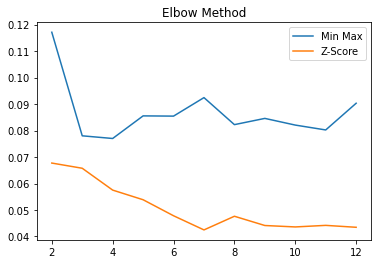

In [ ]:
# print(score_minmax)
# print()
# print(score_zscore)
print ("Min Max")
k_clusters_range = range(1, 13)
sns.lineplot(x = k_clusters_range, y = score_minmax, label='Min Max')
print()
print ("Z-Score")
sns.lineplot(x = k_clusters_range, y = score_zscore, label='Z-Score')
plt.title('Elbow Method')
plt.legend()


In [ ]:
k_clusters_range = range(0, 13)  # Start from 1 to 2, resulting in 2 to 3 clusters

def calc_homogeneity_for_k_range(data, labels_true, k_range):
    homogeneity_scores = []

    for k in k_range:
        if k < 2:
            # K-Means não pode ser calculado para k menor que 2
            homogeneity_scores.append(None)
            continue
        
        # Aplicar o modelo KMeans
        kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(data)
        
        # Assegurar que labels_true e kmeans.labels_ são unidimensionais
        labels_true_flat = labels_true.ravel()  # Flatten labels_true se necessário
        labels_pred_flat = kmeans.labels_.ravel()  # Flatten kmeans.labels_ se necessário

        # Calcular a homogeneidade
        if len(set(labels_true_flat)) > 1 and len(set(labels_pred_flat)) > 1:
            score = homogeneity_score(labels_true_flat, labels_pred_flat)
            homogeneity_scores.append(score)
        else:
            # Não pode calcular homogeneidade se todos os dados estão no mesmo cluster
            homogeneity_scores.append(None)
        
        # Imprimir o score de homogeneidade para cada k
        print(f"Homogeneity score for k={k}: {score if score is not None else 'Not computable (only one cluster)'}")

    return homogeneity_scores

# Exemplo de uso:
print("Min Max")
homogeneity_scores_minmax = calc_homogeneity_for_k_range(normalized_minmax, y, k_clusters_range)
print()
print("Z-Score")
homogeneity_scores_zscore = calc_homogeneity_for_k_range(normalized_zscore, y, k_clusters_range)



Min Max
Homogeneity score for k=2: 0.0005737978593281727
Homogeneity score for k=3: 0.0003350118923452303
Homogeneity score for k=4: 0.0007662568069987252
Homogeneity score for k=5: 0.000636298764408066
Homogeneity score for k=6: 0.0012994466701632267
Homogeneity score for k=7: 0.002442982240176448
Homogeneity score for k=8: 0.0028436859117701935
Homogeneity score for k=9: 0.0033038658232361906
Homogeneity score for k=10: 0.003323856268286653
Homogeneity score for k=11: 0.0038131769597583138
Homogeneity score for k=12: 0.004171241007722024

Z-Score
Homogeneity score for k=2: 0.0005737978593281727
Homogeneity score for k=3: 0.0017762965282320875
Homogeneity score for k=4: 0.007369878216040587
Homogeneity score for k=5: 0.009361645216639862
Homogeneity score for k=6: 0.01014945321820945
Homogeneity score for k=7: 0.00838561214044396
Homogeneity score for k=8: 0.009797758798504131
Homogeneity score for k=9: 0.024312209450032936
Homogeneity score for k=10: 0.017927276557516417
Homogeneity 


Z-Score


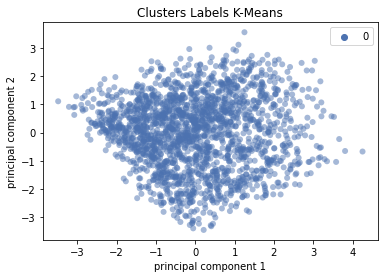

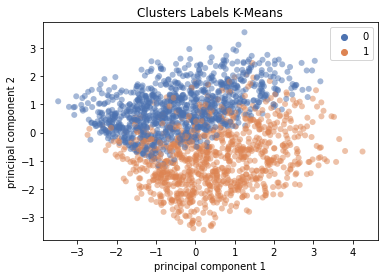

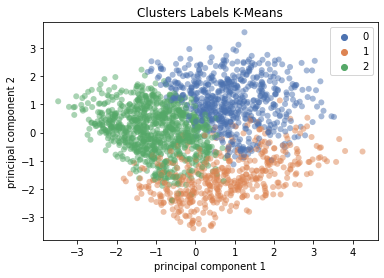

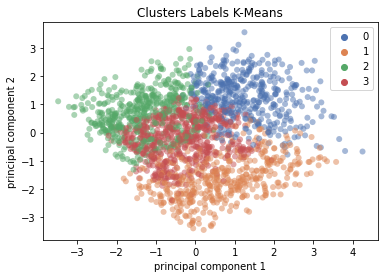

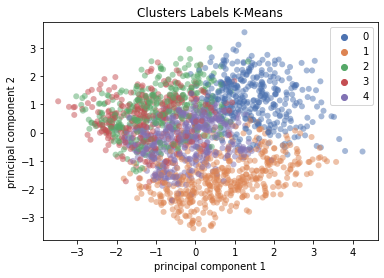

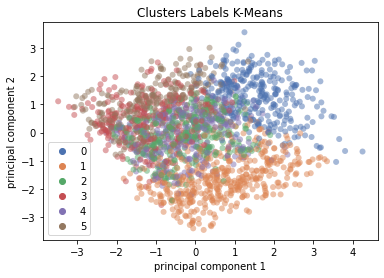

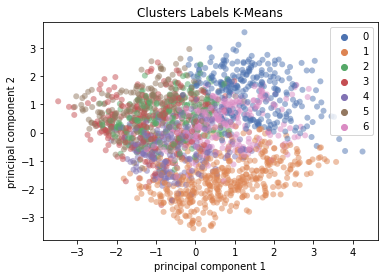

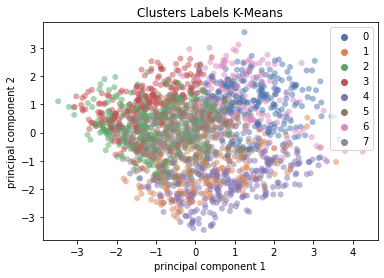

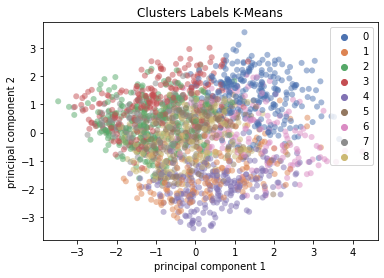

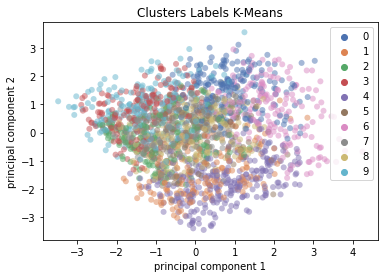

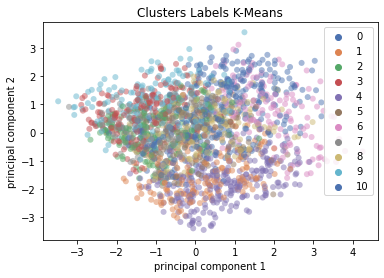

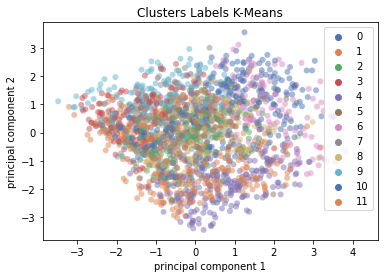

In [ ]:
def plot_samples(projected, labels, title):    
    fig = plt.figure()
    u_labels = np.unique(labels)
    for i in u_labels:
        plt.scatter(projected[labels == i , 0] , projected[labels == i , 1] , label = i,
                    edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('tab10', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.legend()
    plt.title(title)

def plot_silhouette(principal_breast_Df, fits):
    for i in range(0, k_clusters):
        # sns.scatterplot(data = normalized_minmax, x = 'battery_power', y = 'ram', hue = fits[i].labels_)
        sns.scatterplot(data=principal_breast_Df, x='principal component 1', y='principal component 2', hue=fits[i].labels_, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('tab20', 10), palette='deep')
        # plt.title(f'{i+1} clusters')
        plt.title('Clusters Labels K-Means')
        # plot_samples(principal_breast_Df, fits[i].labels_, f'{i+1} clusters')
        plt.show()

# print("Min Max")
# plot_silhouette(principal_breast_Df_minMax, fits_minmax)
print()
print("Z-Score")
plot_silhouette(principal_breast_Df_zscore, fits_zscore)